In [3]:
from pathlib import Path # Handle paths more easily
import matplotlib.pyplot as plt # Make plots
import numpy as np 

import fitsio # Handle fits files
import sys # 
plt.style.use('tableau-colorblind10') # Change style to colorblind

In [4]:
# Import classes to read CoLoRe boxes and compute computations
# read abacus power spectra files in a similar way.
from CoLoRe_corrf_analysis.pk_helper import PKComputations, PKComputationsAbacus

In [6]:
# Whether to use redshift space distortions
rsd = False

## Read Abacus boxes 

In [7]:
# Path where PK output files are stored
abacus_output_location = Path(
    "/global/cfs/cdirs/desi/cosmosim/FirstGenMocks/AbacusSummit/Clustering/"
    "CubicBox/QSO/AbacusSummit_base_c000/z2.000/PK"
)

# Iterate over files and read the PK files. In this case we need to search these files.
# Whether we want to use rsd or not, we have different patterns
if rsd:
    pattern = "*RSD.dat"
else:
    pattern = "*REAL.dat"
    
# Create array to store the different power spectra
# one element per simulation
abacus_boxes = []

# Iterate over files, create instance per file
for pk_file in abacus_output_location.glob(pattern):
    abacus_boxes.append(PKComputationsAbacus(pk_file))

In [13]:
# To access the different properties, of a given box:
box = abacus_boxes[0]
k = box.k
pk = box.compute_npole(n=0) # Get the monopole

Text(0, 0.5, '$P(k)$')

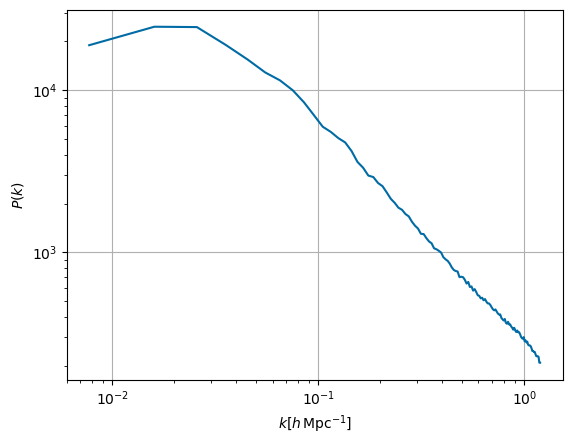

In [33]:
# Now we can easily plot the read Pk
fig, ax = plt.subplots()

ax.plot(k, pk)

ax.set_xscale("log")
ax.set_yscale("log")
ax.grid()

ax.set_xlabel(r"$k [h\,\mathrm{Mpc}^{-1}]$")
ax.set_ylabel(r"$P(k)$")

Text(0, 0.5, '$P(k)$')

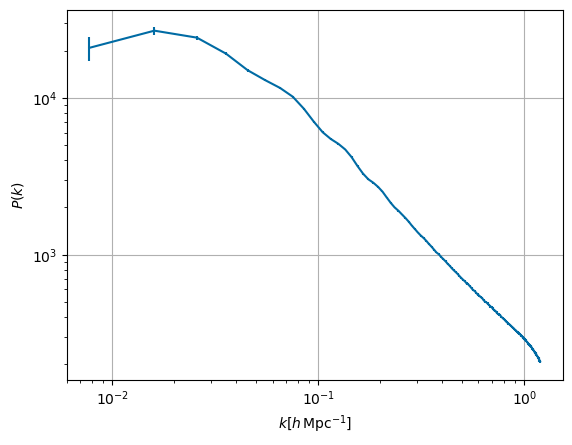

In [35]:
# We can also get error bars by looking at the scatter
# between the different boxes.
k = abacus_boxes[0].k
pks = np.array([box.compute_npole(n=0) for box in abacus_boxes])

fig, ax = plt.subplots()
ax.errorbar(
    k,
    pks.mean(axis=0),
    yerr=pks.std(axis=0, ddof=1), #/len(abacus_boxes), If we divide by the number of boxes, we get the std of a single box.
)
ax.set_xscale("log")
ax.set_yscale("log")
ax.grid()
ax.set_xlabel(r"$k [h\,\mathrm{Mpc}^{-1}]$")
ax.set_ylabel(r"$P(k)$")

## Read CoLoRe boxes

In [27]:
# If we want to perform a similar analysis as with Abacus,
# we need to look at multiple CoLoRe boxes with the same
# cosmology.
colore_boxes_glob = Path(
    "/global/cfs/cdirs/desicollab/users/cramirez/oxford_visit_v2/2lpt_checks/compare_abacus/boxes"
).glob("*v4/results") # This will "search" all boxes finishing with v4, all of them are just variations with different seed

# Create array to store the different measurements
colore_boxes = []
for box in colore_boxes_glob:
    # In the case of abacus, one file contains only one tracer
    # With CoLoRe we can read multiple tracers.
    colore_boxes.append(PKComputations(
        box_dir=box,
        source=1, # CoLoRe tracer to use
        rsd=rsd, # We can read tracers with or without redshift space distortions
    ))

In [29]:
#In the case of CoLoRe boxes, the method .compute_npole can take a while
#because the power spectra needs to be computed.

#Once it has been computed for the first time, it is stored alongside 
#the output so that we don't need to compute it again.

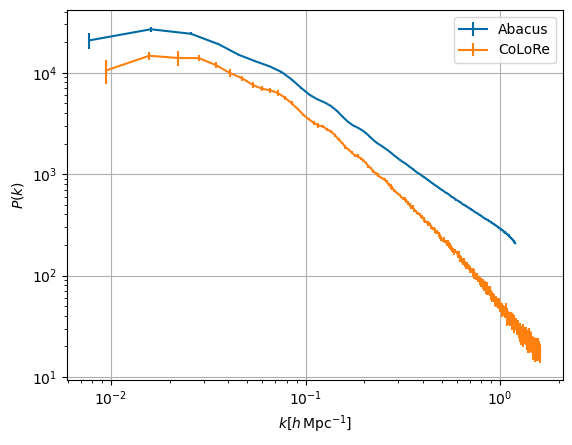

In [36]:
# Now the reading process is exactly the same as with Abacus.
# We can plot both CoLoRe and abacus at the same time.
fig, ax = plt.subplots()

pks = np.array([box.compute_npole(n=0) for box in abacus_boxes])

ax.errorbar(
    abacus_boxes[0].k, # k is the same for all of them, we can just pick the first one
    pks.mean(axis=0),
    yerr=pks.std(axis=0, ddof=1), #/len(abacus_boxes), If we divide by the number of boxes, we get the std of a single box.
    label="Abacus",
)

pks = np.array([box.compute_npole(n=0) for box in colore_boxes])

ax.errorbar(
    colore_boxes[0].k, 
    pks.mean(axis=0),
    yerr=pks.std(axis=0, ddof=1),
    label="CoLoRe",
)

ax.set_xscale("log")
ax.set_yscale("log")
ax.grid()
ax.set_xlabel(r"$k [h\,\mathrm{Mpc}^{-1}]$")
ax.set_ylabel(r"$P(k)$")

ax.legend()